#ASSIGNMENT 5

**CIFAR-10 Classification Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(28, 28, 1)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

CNN.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)             

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from matplotlib import pyplot
from keras.datasets import cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
Cnn_model = models.Sequential()

Cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
Cnn_model.add(layers.MaxPooling2D((2, 2)))

Cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
Cnn_model.add(layers.MaxPooling2D((2, 2)))

Cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
Cnn_model.add(layers.MaxPooling2D((2, 2)))

Cnn_model.add(layers.Flatten())

Cnn_model.add(layers.Dense(128, activation='relu'))
Cnn_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
Cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = Cnn_model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 88s 281ms/step - loss: 0.6864 - accuracy: 0.7615 - val_loss: 0.9045 - val_accuracy: 0.6967
Epoch 2/10
313/313 [==============================] - 83s 265ms/step - loss: 0.6443 - accuracy: 0.7756 - val_loss: 0.8727 - val_accuracy: 0.6966
Epoch 3/10
313/313 [==============================] - 72s 231ms/step - loss: 0.6158 - accuracy: 0.7857 - val_loss: 0.8727 - val_accuracy: 0.7102
Epoch 4/10
313/313 [==============================] - 94s 301ms/step - loss: 0.5800 - accuracy: 0.7990 - val_loss: 0.8713 - val_accuracy: 0.7098
Epoch 5/10
313/313 [==============================] - 75s 239ms/step - loss: 0.5507 - accuracy: 0.8077 - val_loss: 0.9069 - val_accuracy: 0.7043
Epoch 6/10
313/313 [==============================] - 78s 248ms/step - loss: 0.5202 - accuracy: 0.8170 - val_loss: 0.9196 - val_accuracy: 0.7072
Epoch 7/10
313/313 [==============================] - 72s 230ms/step - loss: 0.4849 - accuracy: 0.8314 - val_loss: 0.9093 - val_ac

In [ ]:
test_loss, test_accuracy = Cnn_model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)


313/313 [==============================] - 5s 16ms/step - loss: 0.9941 - accuracy: 0.7044
Test accuracy: 0.7044000029563904


In [ ]:
import matplotlib.pyplot as plt

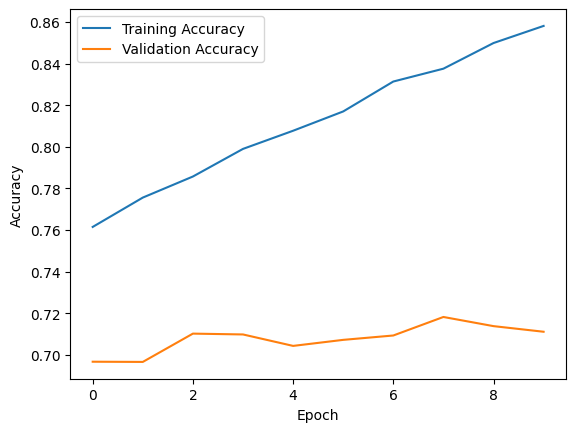

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#ASSIGNMENT 6

**Text Classification using RNN**


**CONSUMER COMPLAINTS**



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = pd.read_csv("/content/connsumerComplaintsSmall.csv")

complaints = data['Consumer complaint narrative'].astype(str)
labels = data['Product']


In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)

train_complaints, val_complaints, train_labels, val_labels = train_test_split(complaints, encoded_labels, test_size=0.2, random_state=42)



In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_complaints)
train_sequences = tokenizer.texts_to_sequences(train_complaints)
val_sequences = tokenizer.texts_to_sequences(val_complaints)
train_padded = pad_sequences(train_sequences, maxlen=100, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
model = Sequential([Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=True),LSTM(32),Dense(128, activation='relu'),Dropout(0.5),Dense(num_classes, activation='softmax')])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.fit(train_padded, train_labels, validation_data=(val_padded, val_labels),epochs=10, batch_size=64, callbacks=[early_stopping])

Epoch 1/10
2/2 [==============================] - 8s 1s/step - loss: 1.9498 - accuracy: 0.1250 - val_loss: 1.9156 - val_accuracy: 0.7619
Epoch 2/10
2/2 [==============================] - 0s 175ms/step - loss: 1.9043 - accuracy: 0.7875 - val_loss: 1.8755 - val_accuracy: 0.7619
Epoch 3/10
2/2 [==============================] - 0s 211ms/step - loss: 1.8592 - accuracy: 0.8000 - val_loss: 1.8124 - val_accuracy: 0.7619
Epoch 4/10
2/2 [==============================] - 0s 228ms/step - loss: 1.7836 - accuracy: 0.8000 - val_loss: 1.7120 - val_accuracy: 0.7619
Epoch 5/10
2/2 [==============================] - 0s 220ms/step - loss: 1.6767 - accuracy: 0.8000 - val_loss: 1.5634 - val_accuracy: 0.7619
Epoch 6/10
2/2 [==============================] - 0s 216ms/step - loss: 1.4625 - accuracy: 0.8000 - val_loss: 1.3727 - val_accuracy: 0.7619
Epoch 7/10
2/2 [==============================] - 0s 243ms/step - loss: 1.3133 - accuracy: 0.8000 - val_loss: 1.1833 - val_accuracy: 0.7619
Epoch 8/10
2/2 [=======

#ASSIGNMENT 7

**PREDICTION MODEL**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/emotion-labels-train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/emotion-labels-test.csv")

data = pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
data.head()

text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6755 entries, 0 to 6754
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6755 non-null   object
 1   label   6755 non-null   object
dtypes: object(2)
memory usage: 105.7+ KB


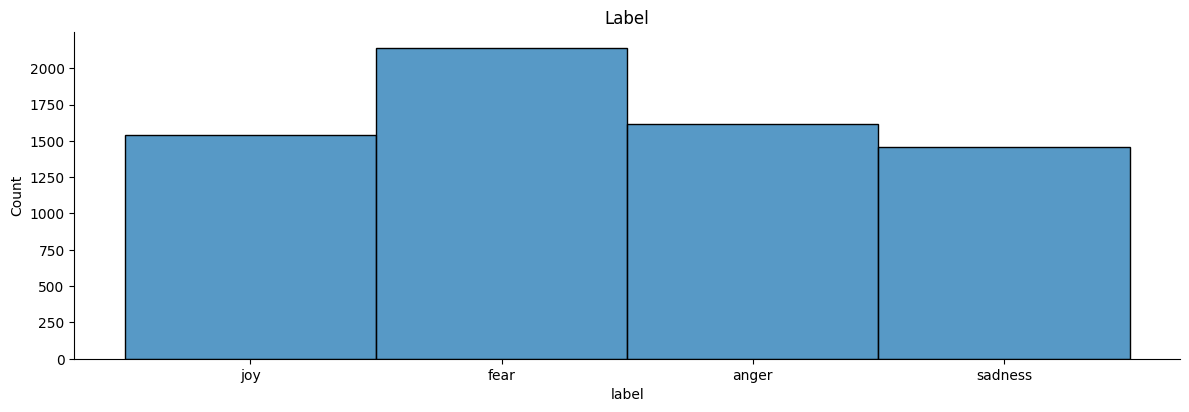

In [ ]:
sns.displot(data.label, height=4, aspect=3)
plt.title('Label')
plt.show()

In [ ]:
data.label = [0 if each == "joy"
              else
              1 if each == "fear"
              else
              2 if each == "anger"
              else 3
              for each in data.label]

In [ ]:
import re
first_text = data.text[4]
text = re.sub("[^a-zA-Z]"," " ,first_text)

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

from nltk.corpus import stopwords
text = nltk.word_tokenize(text)
text = [word for word in text if not word in set(stopwords.words("english"))]

import nltk as nlp
text = " ".join(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
text_list = []

for text in data.text:
    text = re.sub("[^a-zA-Z]"," ",text)
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = " ".join(text)
    text_list.append(text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=2500,stop_words=("english"))

sparce_matrix = count_vectorizer.fit_transform(text_list).toarray()

In [ ]:
y = data.iloc[:,1].values
x = sparce_matrix

from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(x_train,y_train)

print("accuracy : " ,nb.score(x_test,y_test))

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(x_train,y_train)

print("accuracy : " ,dt.score(x_test,y_test))

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=5, random_state=42)

rf.fit(x_train,y_train)

print("accuracy : " , rf.score(x_test, y_test))

accuracy :  0.6301775147928994
accuracy :  0.4701817170886877
accuracy :  0.6441389993136666


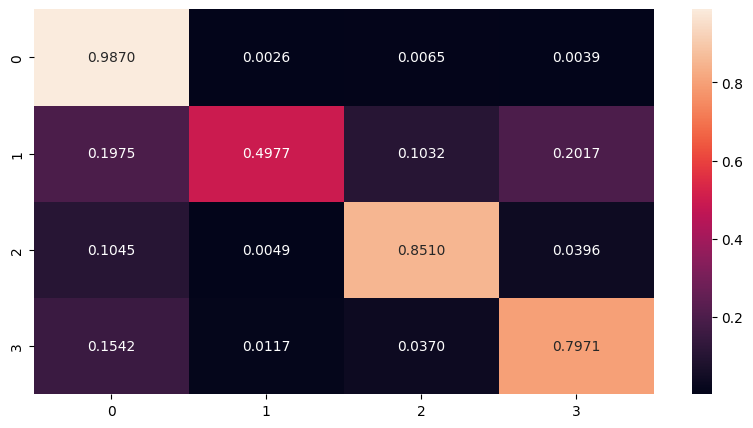

In [ ]:
y_pred = nb.predict(x)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, y_pred, normalize='true')
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='.4f')
plt.show()